In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("dataset/Train.csv")
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [3]:
df.shape

(23856, 18)

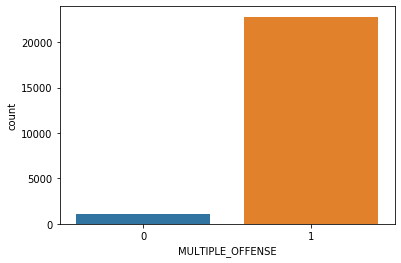

In [4]:
sns.countplot(x='MULTIPLE_OFFENSE', data = df)

* X_1 : 0 - 7
* X_2 : 0 - 60
* X_3 : 0 - 60
* X_4 : 0 - 10
* X_5 : -1 - 6
* X_6 : 0 - 20
* X_7 : 0 - 20
* X_8 : 0 - 100
* X_9 : 0 - 6
* X_10 : 0 - 80+
* X_11 : 0 - 350
* X_12 : 0 - 80+
* X_13 : 0 - 120
* X_14 : -25 - 150
* X_15 : 0 - 50

In [5]:
df.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [6]:
df[df['X_12'].isnull()].head(100)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
167,CR_189499,10-FEB-17,0,36,34,2,1,1,0,1,5,1,174,NaN,103,93,43,1
236,CR_186311,22-NOV-17,0,9,10,7,3,2,7,2,5,1,174,NaN,10,80,0,1
274,CR_189730,07-OCT-17,5,36,34,2,1,18,13,1,5,1,127,NaN,103,87,43,1
315,CR_189713,04-MAR-17,5,36,34,2,1,13,18,1,5,1,174,NaN,92,29,43,1
430,CR_196035,29-NOV-18,0,33,32,2,1,7,1,0,5,1,174,NaN,111,93,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11632,CR_189030,12-APR-17,7,33,32,2,1,9,8,0,5,1,174,NaN,112,62,43,1
11928,CR_189402,23-DEC-17,0,36,34,2,1,1,0,1,5,1,174,NaN,103,93,43,1
11969,CR_196243,01-APR-18,0,36,34,2,1,1,0,1,5,1,174,NaN,103,93,43,1
12351,CR_193408,11-JUN-18,1,9,10,7,3,15,10,1,6,1,174,NaN,116,14,0,1


In [7]:
df[df['X_12'].isnull()].MULTIPLE_OFFENSE.value_counts()

1    182
Name: MULTIPLE_OFFENSE, dtype: int64

In [8]:
df['X_12'].value_counts()

1.0     15674
0.0      5171
2.0      2039
3.0       476
4.0       176
5.0        59
6.0        36
8.0         9
10.0        7
9.0         6
7.0         4
11.0        4
15.0        2
20.0        2
17.0        1
58.0        1
50.0        1
40.0        1
16.0        1
90.0        1
12.0        1
30.0        1
14.0        1
Name: X_12, dtype: int64

In [9]:
values= df.MULTIPLE_OFFENSE.unique()
values = list(values)

C:\Users\rvadyah\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\rvadyah\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0, 0.5, 'Count')

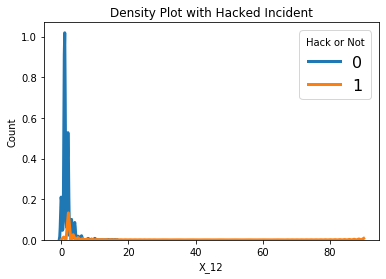

In [10]:

# Iterate through the five airlines
for value in values:
    # Subset to the airline
    subset = df[df.MULTIPLE_OFFENSE==value]
    
    # Draw the density plot
    sns.distplot(subset['X_12'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = value)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Hack or Not')
plt.title('Density Plot with Hacked Incident')
plt.xlabel('X_12')
plt.ylabel('Count')

In [11]:
df.fillna("-100",inplace=True)

In [12]:
df['X_12'] = pd.to_numeric(df['X_12'])

In [13]:
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [14]:
df.isnull().sum()

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

In [15]:
X = df.iloc[:,2:17]
Y = df.MULTIPLE_OFFENSE

In [16]:
X.shape

(23856, 15)

In [17]:
Y.shape

(23856,)

In [18]:
#UDF for model summary
def summarize_classification(y_test, y_pred):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print("accuracy_count : ", num_acc)
    print("accuracy_score : ", acc)
    print("precision_score : ", prec)
    print("recall_score : ", recall)
    print()

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [20]:
print(f"x_train: {x_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

x_train: (16699, 15)
x_test : (7157, 15)
y_train : (16699,)
y_test : (7157,)


#### Model Building

In [23]:
log_model = LogisticRegression()

In [24]:
log_model.fit(x_train, y_train)

C:\Users\rvadyah\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_predict = log_model.predict(x_test)
y_predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [26]:

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.49      0.05      0.09       330
           1       0.96      1.00      0.98      6827

    accuracy                           0.95      7157
   macro avg       0.72      0.52      0.53      7157
weighted avg       0.93      0.95      0.94      7157



In [27]:
pred_results = pd.DataFrame({
        'y_test' : y_test,
        'y_pred' : y_predict
    })
pred_results.head()

,y_test,y_pred
12147,1,1
17547,1,1
11736,1,1
13629,1,1
5189,0,1


In [28]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,17,18
1,313,6809


In [29]:
summarize_classification(pred_results.y_test, pred_results.y_pred)

accuracy_count :  6826
accuracy_score :  0.9537515718876625
precision_score :  0.9560516708789666
recall_score :  0.9973634099897466



In [30]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
y_predict = model.predict(x_test)

In [32]:
pred_results = pd.DataFrame({
        'y_test' : y_test,
        'y_pred' : y_predict
    })
pred_results.head()

,y_test,y_pred
12147,1,1
17547,1,1
11736,1,1
13629,1,1
5189,0,0


In [33]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,328,4
1,2,6823


In [34]:
summarize_classification(pred_results.y_test, pred_results.y_pred)

accuracy_count :  7151
accuracy_score :  0.9991616599133715
precision_score :  0.9997069597069597
recall_score :  0.9994140911088326



In [35]:

## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [36]:
def timer(start_time=None):
    
    if not start_time:
        start_time = datetime.now()
        return start_time
    
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print(f'Time taken: {thour}, minutes: {tmin}, and seconds: {round(tsec,2)}')

In [51]:
classifier = xgb.XGBClassifier()

In [52]:
random_search = RandomizedSearchCV(classifier, param_distributions=params,
                                  n_iter=10, scoring="roc_auc", n_jobs=-1, cv=10, verbose=3)

In [53]:
from datetime import datetime

start_time = timer(None)
random_search.fit(x_train,y_train)
timer(start_time)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


Time taken: 0.0, minutes: 1.0, and seconds: 5.09


In [54]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [56]:
classifier = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=5,  monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
y_predict = classifier.predict(x_test)

In [59]:
pred_results = pd.DataFrame({
        'y_test' : y_test,
        'y_pred' : y_predict
    })


pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,324,4
1,6,6823


In [60]:
summarize_classification(pred_results.y_test, pred_results.y_pred)

accuracy_count :  7147
accuracy_score :  0.9986027665222859
precision_score :  0.9991213940547664
recall_score :  0.9994140911088326



In [61]:
df_test = pd.read_csv("dataset/Test.csv")
df_test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [62]:
df_test.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [63]:
df_test.fillna("-100", inplace=True)
df_test['X_12'] = pd.to_numeric(df_test['X_12'])

In [64]:
df_test.isnull().sum()

INCIDENT_ID    0
DATE           0
X_1            0
X_2            0
X_3            0
X_4            0
X_5            0
X_6            0
X_7            0
X_8            0
X_9            0
X_10           0
X_11           0
X_12           0
X_13           0
X_14           0
X_15           0
dtype: int64

In [65]:
df_test_data = df_test.iloc[:,2:].copy()

In [66]:
df_test_data.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,-100.0,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [67]:
predict_on_test = classifier.predict(df_test.iloc[:,2:].copy())

In [68]:
predict_on_test
predict_on_test_df = pd.DataFrame(predict_on_test, columns=["MULTIPLE_OFFENSE"])
predict_on_test_df.head(10)

,MULTIPLE_OFFENSE
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [69]:
predict_on_test_df.MULTIPLE_OFFENSE.value_counts()

1    15183
0      720
Name: MULTIPLE_OFFENSE, dtype: int64

In [70]:
final_result = pd.concat([df_test, predict_on_test_df], axis=1, sort=False)

In [71]:
final_result.head(10)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,-100.0,72,119,23,1
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34,1
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34,1
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34,1
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43,1
5,CR_81654,25-MAR-01,0,47,48,7,3,4,2,1,6,1,0,0.0,34,29,34,1
6,CR_139009,13-JUL-09,0,33,32,2,1,6,4,0,5,1,174,0.0,103,103,43,1
7,CR_6108,14-SEP-92,0,21,23,4,1,5,6,0,5,1,249,1.0,92,93,34,1
8,CR_62283,31-MAR-99,0,36,34,2,1,1,0,0,5,1,174,0.0,92,93,48,1
9,CR_5710,13-MAR-92,0,16,15,0,0,1,0,3,6,7,316,7.0,72,29,34,1


In [72]:
result_output = final_result[["INCIDENT_ID", "MULTIPLE_OFFENSE"]].copy()

In [73]:
result_output.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [74]:
result_output.to_csv("server_hack_submission_file_2.csv", index=False)
